# Time Series Forecasting using simple Neural Network and LSTM

### Download the Data
S&P 500 data can be downloaded from [Yahoo Finance](https://finance.yahoo.com/quote/%5EGSPC/history?p=%5EGSPC)

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np

In [2]:
# read the data
df = pd.read_csv('S&P_500.csv')

In [3]:
# have a look into the data
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1950-01-03,16.66,16.66,16.66,16.66,16.66,1260000
1,1950-01-04,16.85,16.85,16.85,16.85,16.85,1890000
2,1950-01-05,16.93,16.93,16.93,16.93,16.93,2550000
3,1950-01-06,16.98,16.98,16.98,16.98,16.98,2010000
4,1950-01-09,17.08,17.08,17.08,17.08,17.08,2520000


#### We are only interested in the Adjusted Closing price of S&P 500 index, so we just keep the Date and Adj Close columns and drop the rest

In [3]:
df = df.drop(columns=['Open','High','Low','Close','Volume'])

In [5]:
df.head()

,Date,Adj Close
0,1950-01-03,16.66
1,1950-01-04,16.85
2,1950-01-05,16.93
3,1950-01-06,16.98
4,1950-01-09,17.08


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17393 entries, 0 to 17392
Data columns (total 2 columns):
Date         17393 non-null object
Adj Close    17393 non-null float64
dtypes: float64(1), object(1)
memory usage: 271.8+ KB


In [4]:
# convert Date column object to Datetime using pandas
df.Date = pd.to_datetime(df.Date)

In [5]:
# set the Date column as the index column
df = df.set_index('Date')

In [9]:
df.head()

,Adj Close
Date,
1950-01-03,16.66
1950-01-04,16.85
1950-01-05,16.93
1950-01-06,16.98
1950-01-09,17.08


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17393 entries, 1950-01-03 to 2019-02-15
Data columns (total 1 columns):
Adj Close    17393 non-null float64
dtypes: float64(1)
memory usage: 271.8 KB


In [8]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20,8)

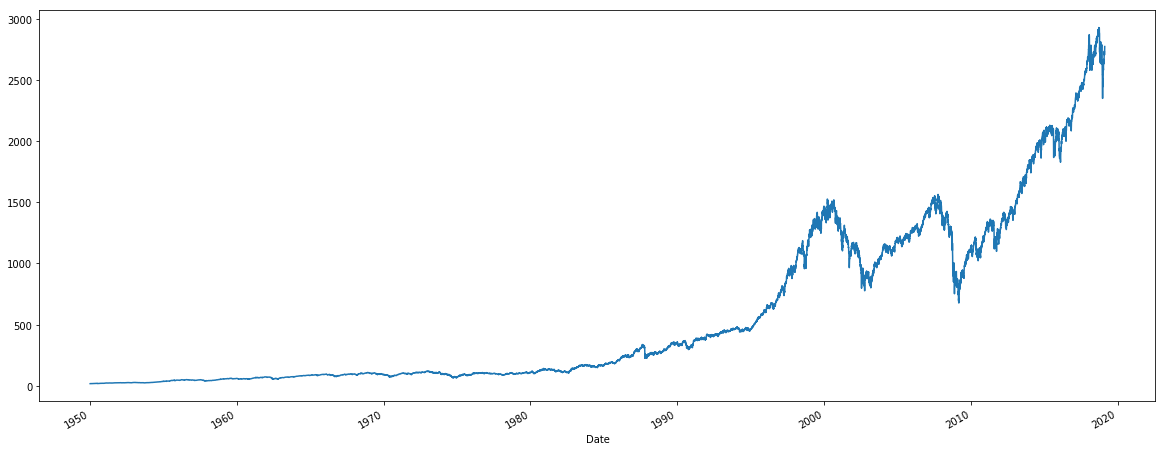

In [9]:
# plot the Adj Close using matplotlib
df['Adj Close'].plot()

In [10]:
# Split the data using date timestamp
split_date = pd.Timestamp('2000-01-01')

In [11]:
df = df['Adj Close']

In [24]:
df.head()

Date
1950-01-03    16.66
1950-01-04    16.85
1950-01-05    16.93
1950-01-06    16.98
1950-01-09    17.08
Name: Adj Close, dtype: float64

In [12]:
# Split the data into training and testing set
train = df.loc[:split_date]
test = df.loc[split_date:]

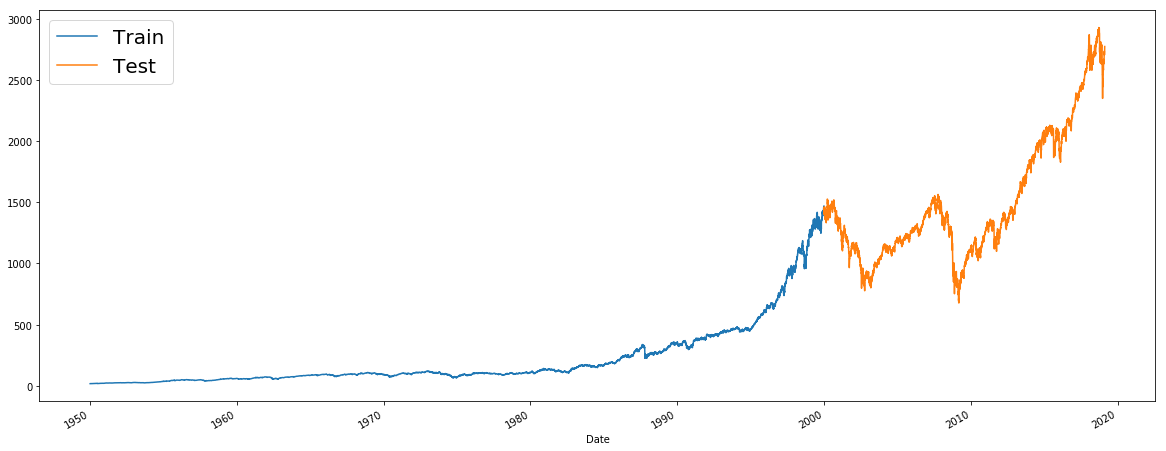

In [13]:
# plot training and testing data
ax = train.plot()
test.plot(ax=ax)
plt.legend(['Train','Test'], prop={'size': 20})

In [21]:
# reshape the train and test data for scaling purpose
train = np.array(train).reshape(-1,1)
test = np.array(test).reshape(-1,1)

In [14]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [22]:
# scale train and test data to [0 and 1] using StandardScaler
train_sc = scaler.fit_transform(train)
test_sc = scaler.transform(test)

In [25]:
X_train = train_sc[:-1]
y_train = train_sc[1:]

X_test = test_sc[:-1]
y_test = test_sc[1:]

In [26]:
type(X_train)

numpy.ndarray

In [27]:
X_train.shape

(12581, 1)

In [28]:
X_test.shape

(4810, 1)

In [30]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

Using TensorFlow backend.


### Build simple neural network

In [31]:
# Sequential Model
nn_model = Sequential()

# 12 Dense neurons with one input dimension & Rectified Linear Unit as the activation function
nn_model.add(Dense(units=12, input_dim=1, activation='relu'))

# Output layer
nn_model.add(Dense(1))     

# Compile the model using mean squared error & Adam optimizer
nn_model.compile(loss='mean_squared_error', optimizer='adam')

# Early Stopping with patience of two, if there is no improvement on loss function
early_stop = EarlyStopping(monitor='loss',patience=2,verbose=1)

# fit the model on the data using batch size of 1 and 100 epochs
nn_model.fit(X_train, y_train, epochs=100, batch_size=1, callbacks=[early_stop], shuffle=False)

Epoch 1/100
12581/12581 [==============================] - 6s 508us/step - loss: 0.0031
Epoch 2/100
12581/12581 [==============================] - 6s 513us/step - loss: 6.9694e-04 0s - loss
Epoch 3/100
12581/12581 [==============================] - 6s 504us/step - loss: 2.9427e-04
Epoch 4/100
12581/12581 [==============================] - 6s 503us/step - loss: 2.9438e-04
Epoch 5/100
12581/12581 [==============================] - 6s 495us/step - loss: 2.4997e-04
Epoch 6/100
12581/12581 [==============================] - 6s 496us/step - loss: 2.4108e-04
Epoch 7/100
12581/12581 [==============================] - 6s 498us/step - loss: 2.3325e-04
Epoch 8/100
12581/12581 [==============================] - 6s 492us/step - loss: 2.3360e-04
Epoch 9/100
12581/12581 [==============================] - 6s 493us/step - loss: 2.3822e-04
Epoch 00009: early stopping


In [32]:
from sklearn.metrics import r2_score

In [33]:
# Check how well our model performs using R2 Score
y_test_pred_nn = nn_model.predict(X_test)
y_train_pred_nn = nn_model.predict(X_train)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_nn)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred_nn)))

The R2 score on the Train set is:	0.954
The R2 score on the Test set is:	0.997


### Our simple neural network perform really well with 99% accuracy on test data.

In [38]:
plt.rcParams.update({'font.size' : 15})

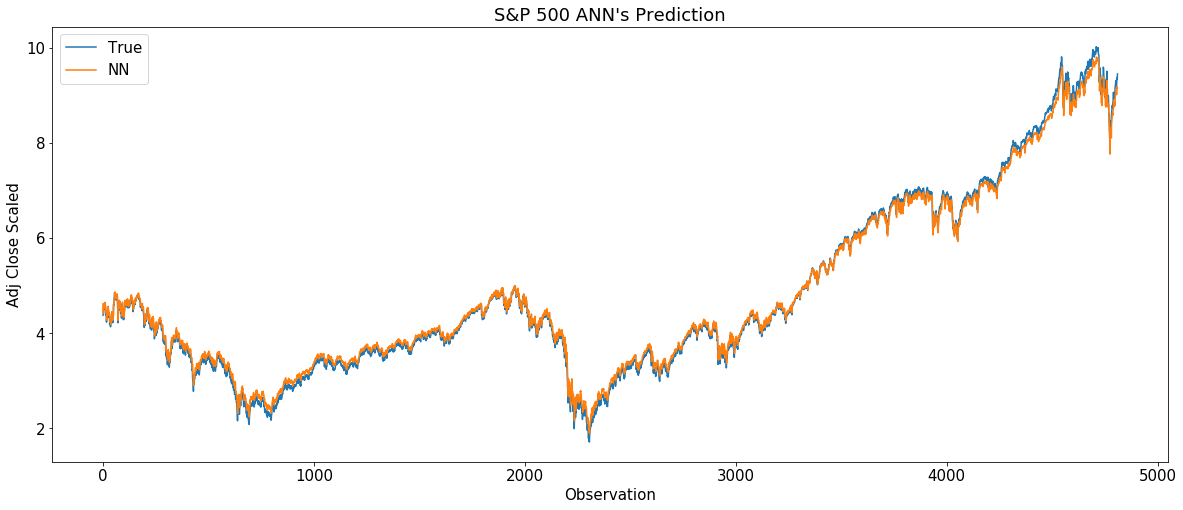

In [39]:
# plot true test data and predicted test data
plt.plot(y_test, label='True')
plt.plot(y_test_pred_nn, label='NN')
plt.title("S&P 500 ANN's Prediction")
plt.xlabel('Observation')
plt.ylabel('Adj Close Scaled')
plt.legend()
plt.show()

In [40]:
# perform inverse transform on scaled data to get origial values
y_test_unscaled_pred_nn = scaler.inverse_transform(y_test_pred_nn)

In [41]:
y_test_unscaled = scaler.inverse_transform(y_test)

In [43]:
type(y_test_unscaled)

numpy.ndarray

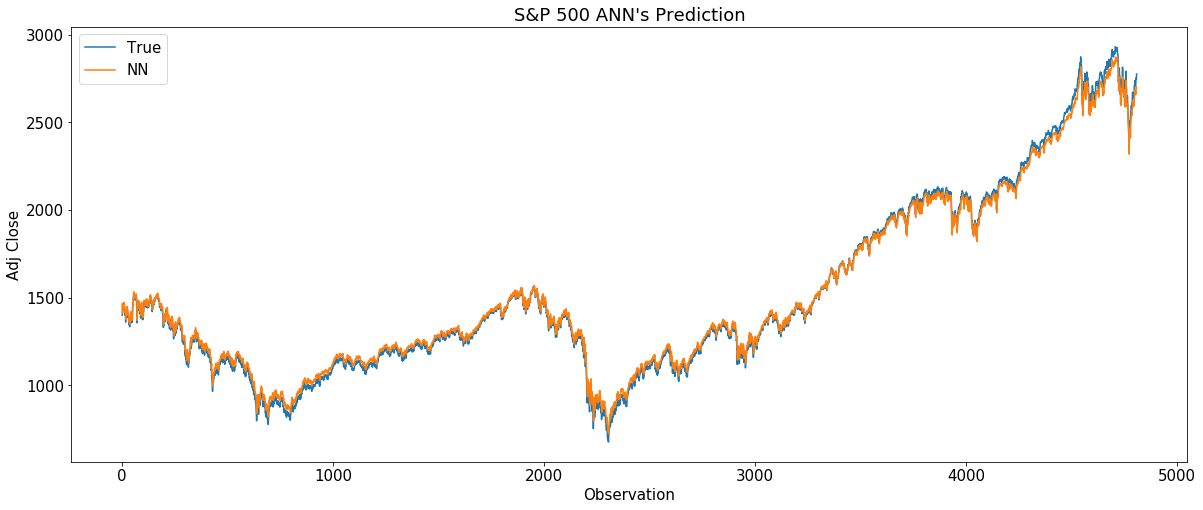

In [42]:
# plot unscaled true test data and predicted test data
plt.plot(y_test_unscaled, label='True')
plt.plot(y_test_unscaled_pred_nn, label='NN')
plt.title("S&P 500 ANN's Prediction")
plt.xlabel('Observation')
plt.ylabel('Adj Close')
plt.legend()
plt.show()

<br>

# Time Series Forecasting using Long Short Term Memory (LSTM)

In [45]:
# convert the scaled train and test data into Pandas DataFrame and rename Adjusted Close column to "Y"
train_sc_df = pd.DataFrame(train_sc, columns=['Y'])
test_sc_df = pd.DataFrame(test_sc, columns=['Y'])

In [46]:
type(train_sc_df)

pandas.core.frame.DataFrame

In [47]:
train_sc_df.head()

,Y
0,-0.726207
1,-0.725506
2,-0.725211
3,-0.725026
4,-0.724657


In [49]:
# shift the index of train and test data
train_sc_df['X_1'] = train_sc_df['Y'].shift()
test_sc_df['X_1'] = test_sc_df['Y'].shift()

In [50]:
train_sc_df.head()

,Y,X_1
0,-0.726207,NaN
1,-0.725506,-0.726207
2,-0.725211,-0.725506
3,-0.725026,-0.725211
4,-0.724657,-0.725026


#### Check for null values on train and test data

In [52]:
train_sc_df.isnull().sum()

Y      0
X_1    1
dtype: int64

In [53]:
test_sc_df.isnull().sum()

Y      0
X_1    1
dtype: int64

#### Drop null values on train data

In [57]:
X_train_lstm = train_sc_df.dropna().drop(columns=['Y'])
y_train_lstm = train_sc_df.dropna().drop(columns=['X_1'])

In [55]:
X_train_lstm.head()

,X_1
1,-0.726207
2,-0.725506
3,-0.725211
4,-0.725026
5,-0.724657


In [58]:
y_train_lstm.head()

,Y
1,-0.725506
2,-0.725211
3,-0.725026
4,-0.724657
5,-0.724842


#### Drop null values on test data

In [59]:
X_test_lstm = test_sc_df.dropna().drop(columns=['Y'])
y_test_lstm = test_sc_df.dropna().drop(columns=['X_1'])

In [64]:
# convert the DataFrame into its Numpy array representation
X_train_lstm = X_train_lstm.as_matrix()
y_train_lstm = y_train_lstm.as_matrix()

X_test_lstm = X_test_lstm.as_matrix()
y_test_lstm = y_test_lstm.as_matrix()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [73]:
print(X_train_lstm.shape)
print(X_test_lstm.shape)

(12581, 1)
(4810, 1)


In [75]:
# the input to LSTM layer needs to have the shape of (number of samples, the dimension of each element)
X_train_lstm = X_train_lstm.reshape(X_train_lstm.shape[0],1,1)
X_test_lstm = X_test_lstm.reshape(X_test_lstm.shape[0],1,1)

In [76]:
print(X_train_lstm.shape)
print(X_test_lstm.shape)

(12581, 1, 1)
(4810, 1, 1)


In [78]:
from keras.layers import LSTM

In [79]:
# Sequential Model
lstm_model = Sequential()

# 7 neurons with input shape of (1,1), kernel initializer as 'lecun_uniform' & 'relu' as the activation function
lstm_model.add(LSTM(units=7,input_shape=(1,1),activation='relu',kernel_initializer='lecun_uniform',return_sequences=False))

# Output layer
lstm_model.add(Dense(1))

# Compile the model using mean squared error & Adam optimizer
lstm_model.compile(loss='mean_squared_error', optimizer='adam')

# Early Stopping with patience of three, if there is no improvement on loss function
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)

# fit the model on the data using batch size of 1 and 100 epochs
lstm_model.fit(X_train_lstm, y_train_lstm, epochs=100, batch_size=1, shuffle=False, callbacks=[early_stop])

Epoch 1/100
12581/12581 [==============================] - 17s 1ms/step - loss: 0.0114
Epoch 2/100
12581/12581 [==============================] - 15s 1ms/step - loss: 0.0029
Epoch 3/100
12581/12581 [==============================] - 15s 1ms/step - loss: 3.5685e-04
Epoch 4/100
12581/12581 [==============================] - 15s 1ms/step - loss: 2.7555e-04
Epoch 5/100
12581/12581 [==============================] - 17s 1ms/step - loss: 2.5780e-04
Epoch 6/100
12581/12581 [==============================] - 16s 1ms/step - loss: 2.5430e-04
Epoch 7/100
12581/12581 [==============================] - 16s 1ms/step - loss: 2.5391e-04
Epoch 8/100
12581/12581 [==============================] - 15s 1ms/step - loss: 2.5308e-04
Epoch 9/100
12581/12581 [==============================] - 15s 1ms/step - loss: 2.4812e-04
Epoch 10/100
12581/12581 [==============================] - 15s 1ms/step - loss: 2.4823e-04
Epoch 11/100
12581/12581 [==============================] - 17s 1ms/step - loss: 2.4808e-04
Epoch

In [80]:
# Check how well our model performs using R2 Score
y_test_pred_lstm = lstm_model.predict(X_test_lstm)
y_train_pred_lstm = lstm_model.predict(X_train_lstm)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred_lstm)))

The R2 score on the Train set is:	0.987
The R2 score on the Test set is:	0.981


### Our LSTM model performed with 98% accuracy on test data.

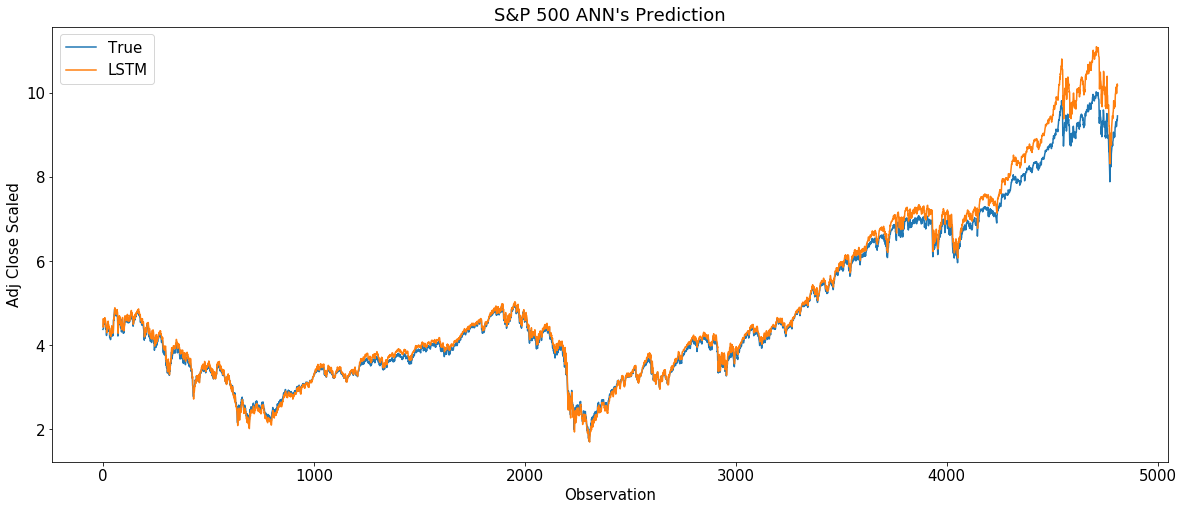

In [81]:
# plot true test data and predicted test data
plt.plot(y_test, label='True')
plt.plot(y_test_pred_lstm, label='LSTM')
plt.title("S&P 500 ANN's Prediction")
plt.xlabel('Observation')
plt.ylabel('Adj Close Scaled')
plt.legend()
plt.show()